# Step 1: Import Required Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer


# Step 2: Upload CSV File Using Google Colab’s Upload Option

In [3]:
# Import the files module for uploading
from google.colab import files

# Upload the CSV file
uploaded = files.upload()



Saving Cluster2_Pheno-data.csv to Cluster2_Pheno-data.csv


In [4]:
# Load the dataset
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['Cluster2_Pheno-data.csv']))

# Preview the dataset
print("Dataset Preview:")
print(data.head())


Dataset Preview:
   Unnamed: 0  ProjectID shorthand_x                   FILE_LIST_x  YEAR_x  \
0           0     235024        C2.1  project235024_year2001.Rdata    2001   
1           1     235024        C2.1  project235024_year2001.Rdata    2001   
2           2     235024        C2.1  project235024_year2001.Rdata    2001   
3           3     235024        C2.1  project235024_year2001.Rdata    2001   
4           4     235024        C2.1  project235024_year2001.Rdata    2001   

    LOC  LONGITUDE  LATITUDE  LINE      ERM  ...  shorthand_y  Unnamed: 0_y  \
0  ILBM     -89.12     39.70   1.0  115.337  ...         C2.1          1381   
1  ILMN     -90.65     40.91   1.0  113.284  ...         C2.1          1381   
2  INVI     -87.52     38.68   1.0  114.346  ...         C2.1          1381   
3  MOBU     -94.20     39.14   1.0  113.914  ...         C2.1          1381   
4  MOHA     -94.98     39.34   1.0  116.823  ...         C2.1          1381   

   MAB_PROJECT_ID  YEAR_y  GERMPLASM_ID

# Step 3: Exploratory Data Analysis (EDA)

EDA helps you explore the dataset’s distribution, relationships, and any anomalies.

In [8]:
# Summary Statistics

## summary statistics for numerical columns

print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
          Unnamed: 0     ProjectID         YEAR_x      LONGITUDE  \
count  535340.000000  5.353400e+05  535340.000000  532726.000000   
mean   267669.500000  5.120760e+06    2004.198160     -91.237992   
std    154539.490891  2.866665e+06       2.059361       5.036232   
min         0.000000  2.350240e+05    2000.000000    -102.500000   
25%    133834.750000  3.426407e+06    2003.000000     -94.890000   
50%    267669.500000  3.438435e+06    2004.000000     -91.340000   
75%    401504.250000  9.442056e+06    2005.000000     -88.570000   
max    535339.000000  1.006631e+07    2008.000000     -75.610000   

            LATITUDE           LINE            ERM            MST  \
count  532726.000000  535340.000000  331368.000000  520111.000000   
mean       41.201070     139.168378     107.540295      19.613414   
std         2.363221     270.537271       6.890731       4.131381   
min        30.870000       1.000000     -24.308700       8.220000   
25%        39.980000 

In [9]:
# check for unique values in the categorocal columns

categorical_columns = ['YEAR_x', 'LOC', 'LINE_UNIQUE_ID', 'CROSS']

for col in categorical_columns:
    print(f"\nUnique values in {col}: {data[col].nunique()}")



Unique values in YEAR_x: 9

Unique values in LOC: 390

Unique values in LINE_UNIQUE_ID: 76635

Unique values in CROSS: 473


### Visualizations for Key Columns
Use visualizations to better understand the data's distribution and any potential outliers.

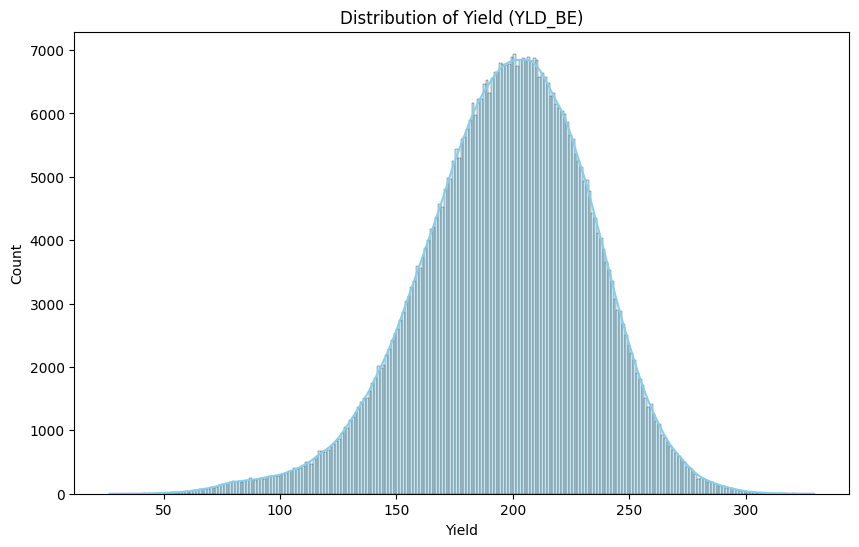

In [48]:
# Distribution of Yield (YLD_BE)

plt.figure(figsize=(10, 6))
sns.histplot(data['YLD_BE'], kde=True, color='skyblue')
plt.xlabel('Yield')
plt.title('Distribution of Yield (YLD_BE)')
plt.show()

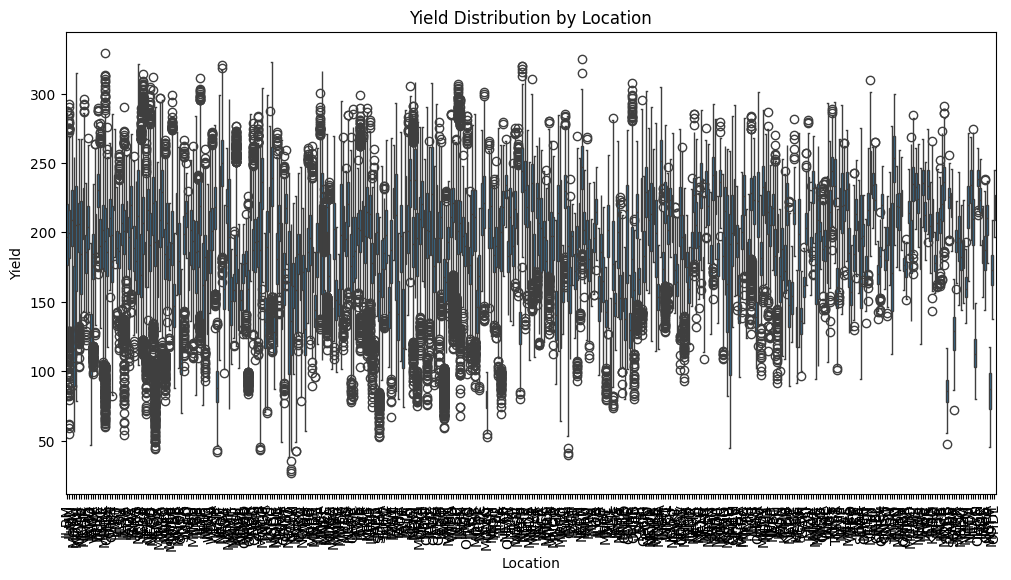

In [49]:
# Boxplot for Yield (YLD_BE) by location

plt.figure(figsize=(12, 6))
sns.boxplot(x='LOC', y='YLD_BE', data=data)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Yield')
plt.title('Yield Distribution by Location')
plt.show()

In [50]:
# Count occurrences for each location
location_counts = data['LOC'].value_counts()
print(location_counts)

LOC
ILPP    14415
MNBI    11048
ILMN    10889
ILWA     9038
ILBM     8833
        ...  
INWS       65
MOTH       64
IAEL       57
NEPM       57
ILGT       16
Name: count, Length: 390, dtype: int64


In [51]:
# Unique location-year combinations
unique_loc_year = data[['LOC', 'YEAR_x']].drop_duplicates()
print("Unique Location-Year Pairs:", unique_loc_year.shape[0])


Unique Location-Year Pairs: 1090


In [52]:
# Unique location-year-line combinations
unique_loc_year_line = data[['LOC', 'YEAR_x', 'LINE_UNIQUE_ID']].drop_duplicates()
print("Unique Location-Year-Line Combinations:", unique_loc_year_line.shape[0])

# this code will basically provide the total number of rows, because, unique "location-year-line" combination will never repeat
# so it will show all the rows in the dataset, i.e, 533,203.

Unique Location-Year-Line Combinations: 533203


In [53]:
# Calculate the average yield per location
avg_yield_per_loc = data.groupby('LOC')['YLD_BE'].mean()
print(avg_yield_per_loc)


LOC
ARMA    163.729383
ARPI    193.399465
COJU    229.814773
CONE    129.194154
COOV    195.925292
           ...    
WIMR    154.762851
WIPL    200.181323
WIPO    214.050946
WIUI    178.168441
WIWA    204.045106
Name: YLD_BE, Length: 390, dtype: float64


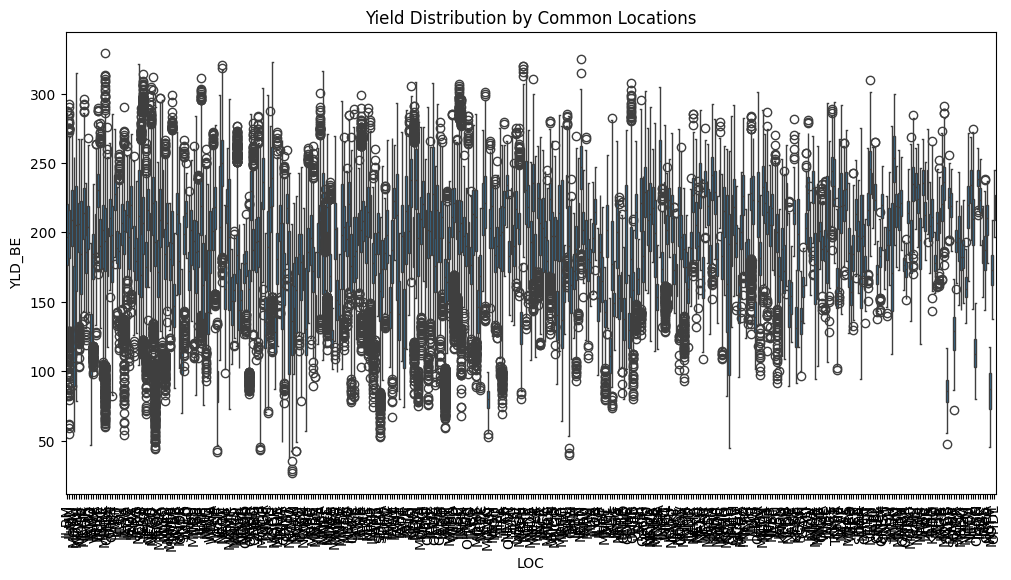

In [54]:
## Our boxplot is too cluttered, there are a few techniques we can use to improve readability, especially when we
## have many unique locations. Here are some suggestions:

## Filter Locations by Frequency:

## We can plot only the most common locations or those with the highest yield values. This reduces the number of categories displayed.

## Filter for locations with more than a certain number of enteries

location_counts = data['LOC'].value_counts()
common_locations = location_counts[location_counts > 20].index
## This filtered dataset will only include data for locations that appear at least 20 times across all years and lines.
## this will basically show all the dataset again, because all the locations are occuring at least 20 times, except location "ILGT"
## the output boxplot will be clutered again.

filtered_data = data[data['LOC'].isin(common_locations)]


plt.figure(figsize=(12, 6))
sns.boxplot(x='LOC', y='YLD_BE', data=filtered_data)
plt.xticks(rotation=90)
plt.title('Yield Distribution by Common Locations')
plt.show()

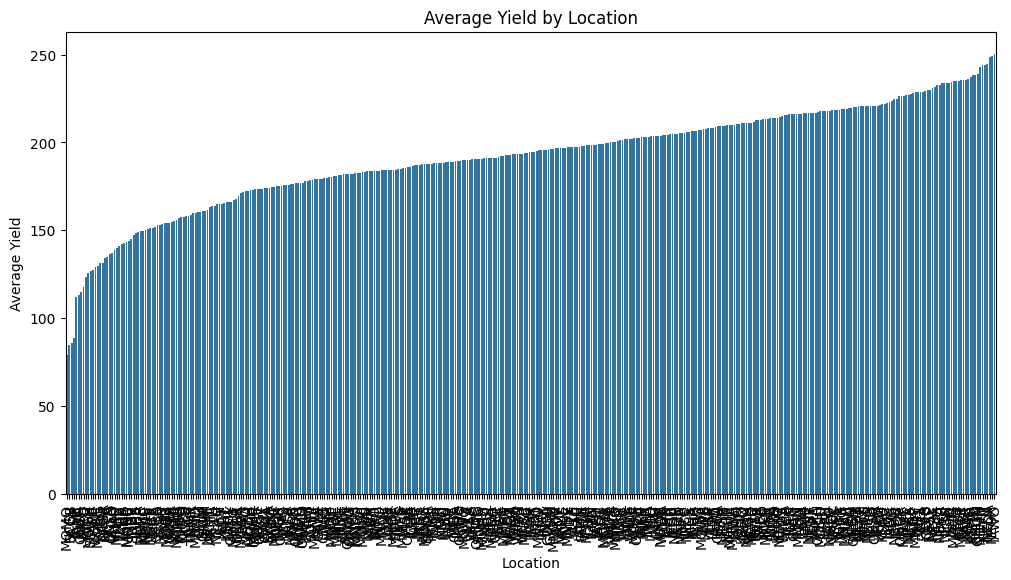

In [55]:
## Rather than showing each data point by location, we can aggregate the data and plot the average yield per location.


# Aggregate data by location
loc_avg_yield = data.groupby('LOC')['YLD_BE'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=loc_avg_yield.index, y=loc_avg_yield.values)
plt.xticks(rotation=90)
plt.title('Average Yield by Location')
plt.xlabel('Location')
plt.ylabel('Average Yield')
plt.show()


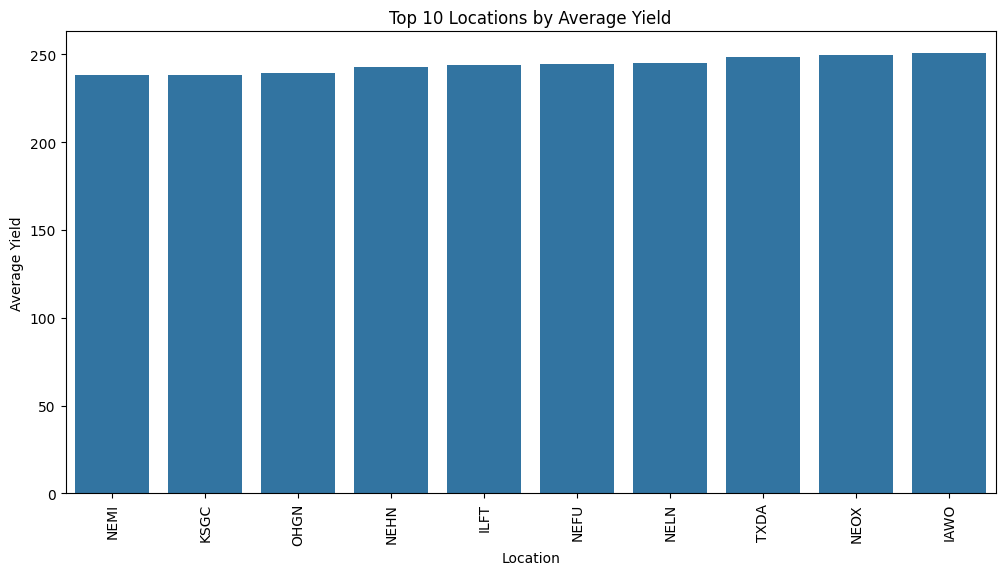

In [56]:
## Limit to Top-N Locations by Average Yield:

## Focus on the top 10 or 15 locations with the highest or lowest average yields.


# Get top 10 locations with highest average yield
top_locations = loc_avg_yield.tail(10)  # Adjust the number as needed

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.xticks(rotation=90)
plt.title('Top 10 Locations by Average Yield')
plt.xlabel('Location')
plt.ylabel('Average Yield')
plt.show()


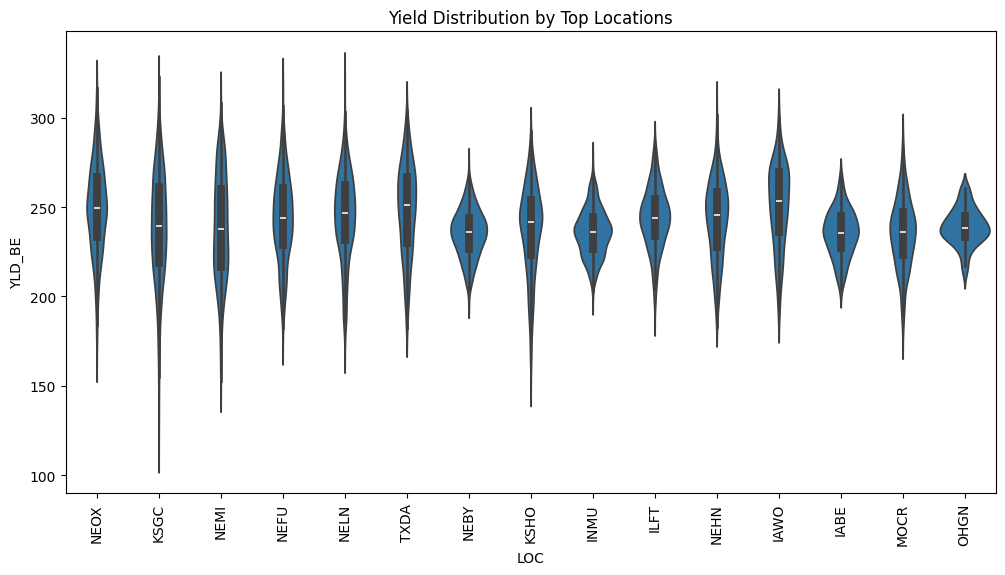

In [57]:
# Use a Violin Plot with Limited Data:

# Filter to top 10 or 15 locations with highest yield (as an example)
selected_locations = loc_avg_yield.tail(15).index
filtered_data = data[data['LOC'].isin(selected_locations)]

plt.figure(figsize=(12, 6))
sns.violinplot(x='LOC', y='YLD_BE', data=filtered_data)
plt.xticks(rotation=90)
plt.title('Yield Distribution by Top Locations')
plt.show()


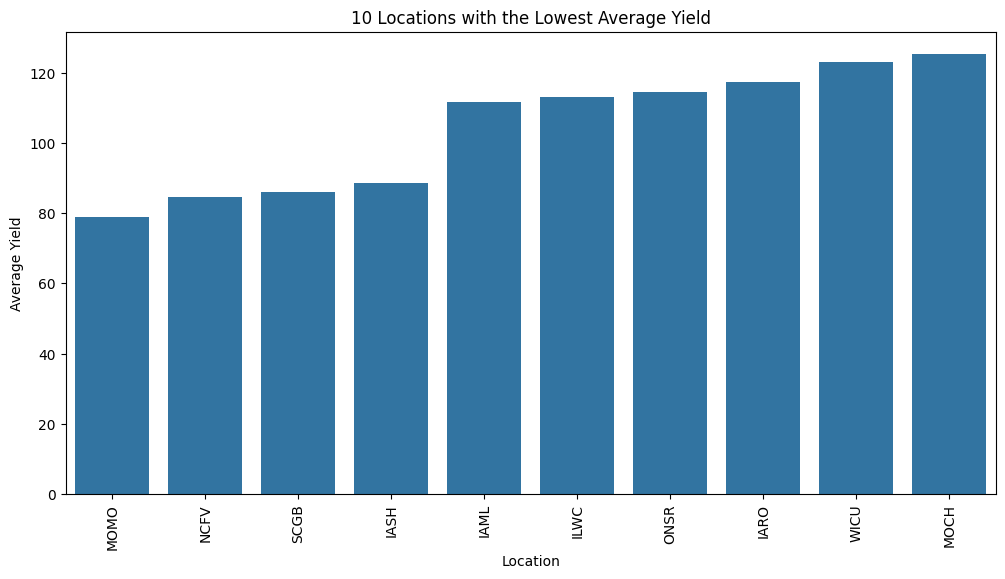

In [58]:
# Calculate average yield per location
loc_avg_yield = data.groupby('LOC')['YLD_BE'].mean().sort_values()

# Select the 10 locations with the lowest average yield
lowest_yield_locations = loc_avg_yield.head(10)

## use ".head()" for lowest yield and ".tail()" for highest yield.
## Because we already sorted the data based on mean values.

# Plot the lowest 10 locations by average yield
plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_yield_locations.index, y=lowest_yield_locations.values)
plt.xticks(rotation=90)
plt.title('10 Locations with the Lowest Average Yield')
plt.xlabel('Location')
plt.ylabel('Average Yield')
plt.show()


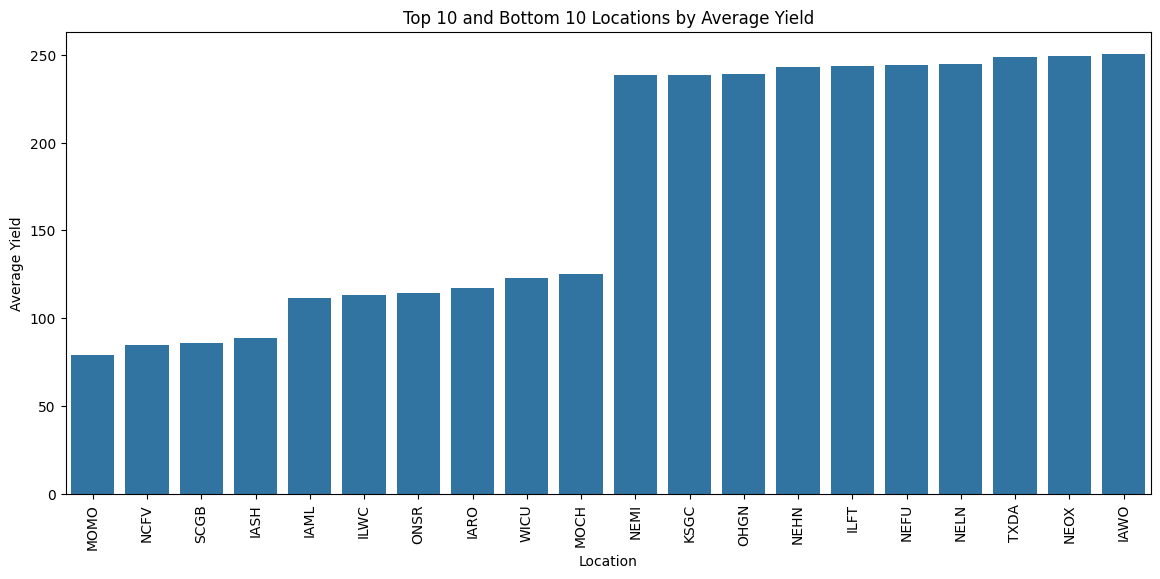

In [60]:
# Select the 10 locations with the highest and lowest average yield
highest_yield_locations = loc_avg_yield.tail(10)
lowest_yield_locations = loc_avg_yield.head(10)

# Concatenate the two series
top_bottom_locations = pd.concat([lowest_yield_locations, highest_yield_locations])

# Plot the combined top and bottom locations by average yield
plt.figure(figsize=(14, 6))
sns.barplot(x=top_bottom_locations.index, y=top_bottom_locations.values)
plt.xticks(rotation=90)
plt.title('Top 10 and Bottom 10 Locations by Average Yield')
plt.xlabel('Location')
plt.ylabel('Average Yield')
plt.show()


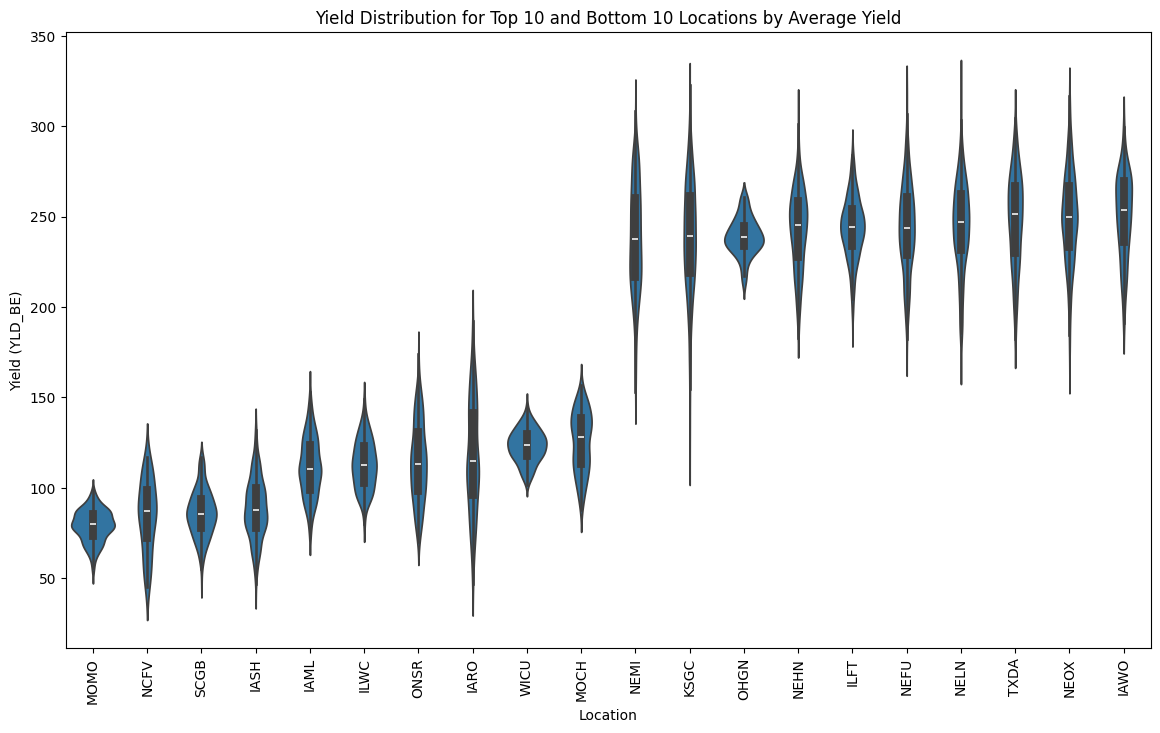

In [67]:
# Calculate average yield per location if not already done
loc_avg_yield = data.groupby('LOC')['YLD_BE'].mean().sort_values()

# Select the 10 locations with the highest and lowest average yield
highest_yield_locations = loc_avg_yield.tail(10).index.tolist()
lowest_yield_locations = loc_avg_yield.head(10).index.tolist()

# Combine the top and bottom locations into a single list for ordering
selected_locations = lowest_yield_locations + highest_yield_locations

# Filter the dataset to include only the selected top and bottom locations
filtered_data = data[data['LOC'].isin(selected_locations)]

# Plot the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='LOC', y='YLD_BE', data=filtered_data, order=selected_locations)
plt.xticks(rotation=90)
plt.title('Yield Distribution for Top 10 and Bottom 10 Locations by Average Yield')
plt.xlabel('Location')
plt.ylabel('Yield (YLD_BE)')
plt.show()


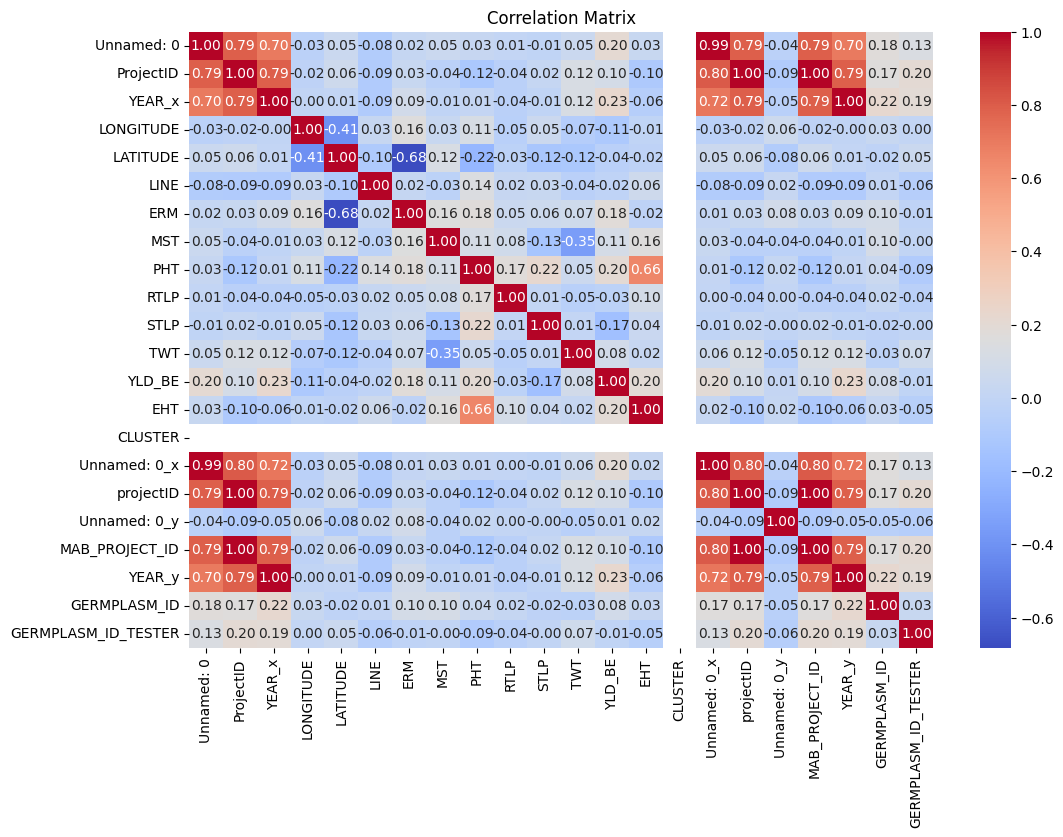

In [15]:
# Correlation matrix

plt.figure(figsize=(12, 8))
## sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
## If we use data.corr(), then it will throw an error, because there are some column which are not numeric.
## So, we need to select only numeric columns for this matrix

# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

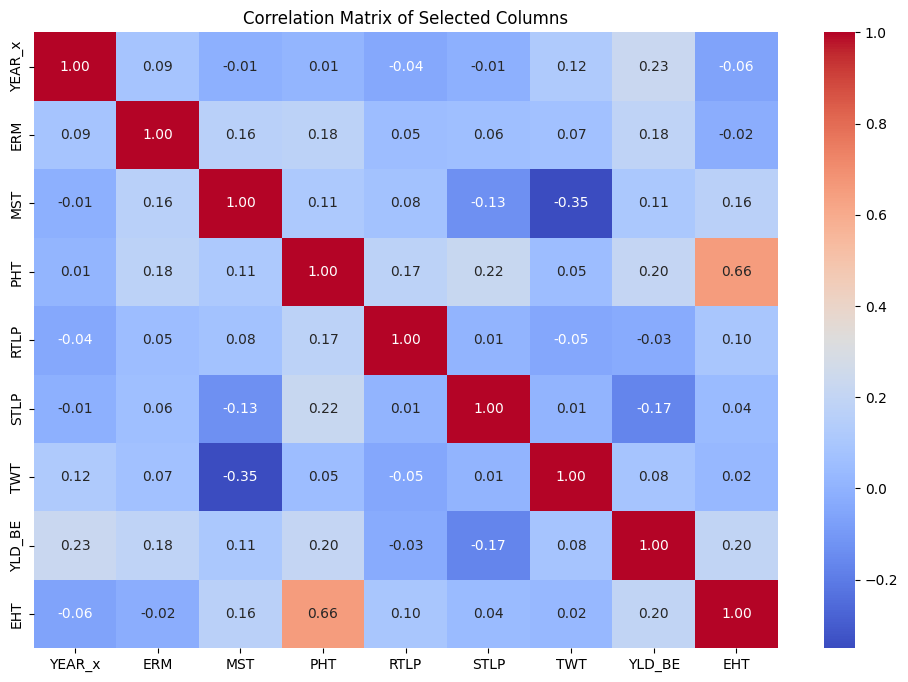

In [16]:
# Select only the specific columns for the correlation matrix
selected_columns = ['YEAR_x', 'ERM', 'MST', 'PHT', 'RTLP', 'STLP', 'TWT', 'YLD_BE', 'EHT']
selected_data = data[selected_columns]

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Columns')
plt.show()


# Step 2: Feature Engineering

Depending on the insights from your EDA, we might want to create new features. For example:
1. `Interaction Terms`: Create interaction terms between MST and TWT if we believe they might jointly impact yield.
2. `Environmental Conditions`: Calculate average yield per location or create flags for high-yield or low-yield locations.

In [68]:
# Interaction Term between MST and TWT
data['MST_TWT_interaction'] = data['MST'] * data['TWT']

# Flag for High/Low Yield Locations
median_yield = data['YLD_BE'].median()
data['high_yield_location'] = np.where(data['YLD_BE'] >= median_yield, 1, 0)

print("\nPreview of Data with New Features:")
print(data.head())



Preview of Data with New Features:
   Unnamed: 0  ProjectID shorthand_x                   FILE_LIST_x  YEAR_x  \
0           0     235024        C2.1  project235024_year2001.Rdata    2001   
1           1     235024        C2.1  project235024_year2001.Rdata    2001   
2           2     235024        C2.1  project235024_year2001.Rdata    2001   
3           3     235024        C2.1  project235024_year2001.Rdata    2001   
4           4     235024        C2.1  project235024_year2001.Rdata    2001   

    LOC  LONGITUDE  LATITUDE  LINE      ERM  ...  MAB_PROJECT_ID  YEAR_y  \
0  ILBM     -89.12     39.70   1.0  115.337  ...          235024    2001   
1  ILMN     -90.65     40.91   1.0  113.284  ...          235024    2001   
2  INVI     -87.52     38.68   1.0  114.346  ...          235024    2001   
3  MOBU     -94.20     39.14   1.0  113.914  ...          235024    2001   
4  MOHA     -94.98     39.34   1.0  116.823  ...          235024    2001   

   GERMPLASM_ID  GENERATION_NAME      

# Step 3: Data Splitting

To evaluate our model, split the data into training and test sets. Here’s how to set it up:

In [70]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['YLD_BE', 'LINE_UNIQUE_ID'])  # Exclude target and unique ID
y = data['YLD_BE']

# Split data (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)


Training Set Size: (374738, 33)
Test Set Size: (160602, 33)


# Step 4: Save Data Splits for Future Use

If we like to save these splits to load later without re-running previous steps, here’s how:

In [71]:
# Save the train and test datasets
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
